In [130]:
import numpy as np
import random
from matplotlib import pyplot as plt
import math
import seaborn as sns

sns.set_theme()

ARRAY_LENGTH = int(1e4)
LOWER_BOUND = np.sqrt(2)
UPPER_BOUND = np.e * 5

In [131]:
# Generate values with a constant step size
p0 = np.linspace(start=LOWER_BOUND, stop=UPPER_BOUND, num=ARRAY_LENGTH)

# Generate a list of numbers between LOWER_BOUND and UPPER_BOUND
# From this list, choose a random sample of ARRAY_LENGTH numbers
SAMPLE_SIZE = 100
samples = np.linspace(start=LOWER_BOUND, stop=UPPER_BOUND, num=SAMPLE_SIZE*ARRAY_LENGTH)
p1 = random.sample(list(samples), ARRAY_LENGTH)

# Shuffle the indices of p0
p2 = np.random.permutation(p0)

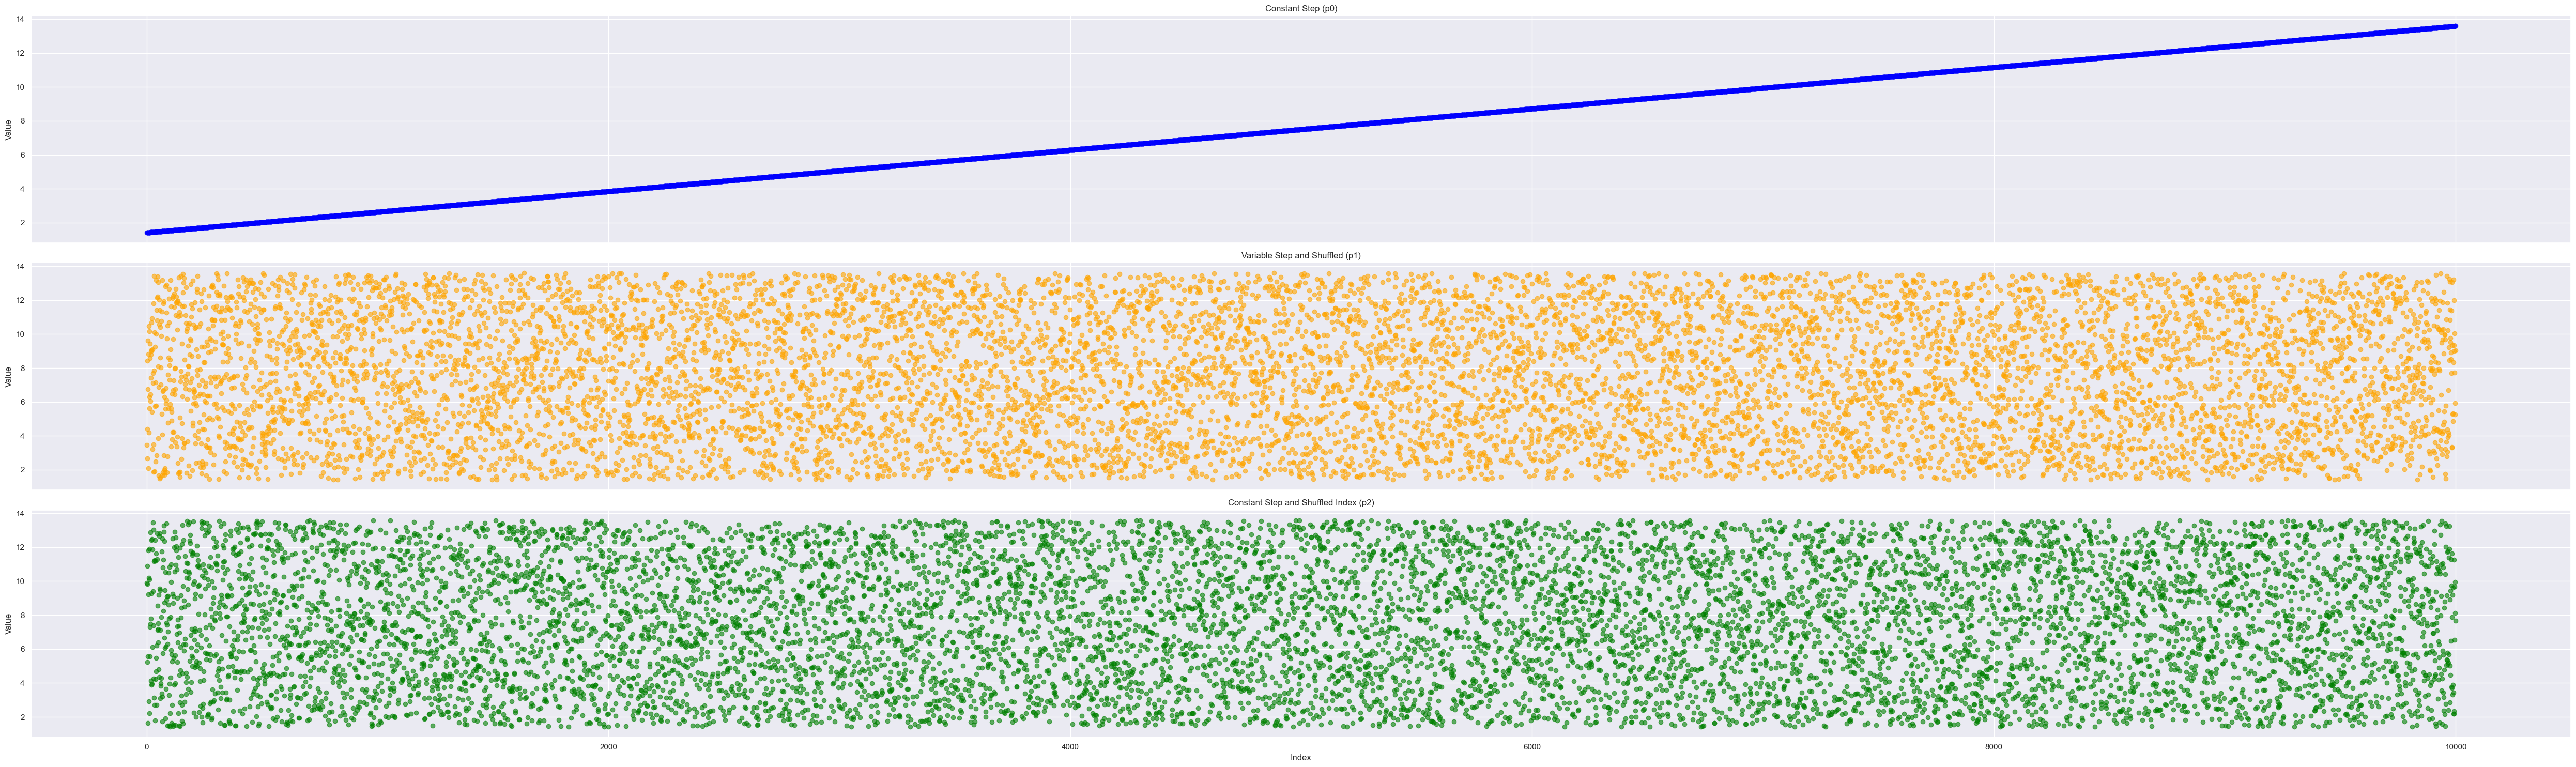

In [137]:
fig, axes = plt.subplots(3, 1, figsize=(50, 15), sharex=True)

# Plot p0
axes[0].scatter(range(len(p0)), p0, label='Constant Step (p0)', color='blue', alpha=0.6)
axes[0].set_title('Constant Step (p0)')
axes[0].set_ylabel('Value')

# Plot p1
axes[1].scatter(range(len(p1)), p1, label='Variable Step and Shuffled (p1)', color='orange', alpha=0.6)
axes[1].set_title('Variable Step and Shuffled (p1)')
axes[1].set_ylabel('Value')

# Plot p2
axes[2].scatter(range(len(p2)), p2, label='Constant Step and Shuffled Index (p2)', color='green', alpha=0.6)
axes[2].set_title('Constant Step and Shuffled Index (p2)')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Value')

plt.tight_layout()
plt.show()

[[np.int64(0), np.int64(1)], [np.int64(1), np.int64(0)], [np.int64(2), np.int64(1)], [np.int64(3), np.int64(2)], [np.int64(4), np.int64(3)]]
[np.float64(0.0012178413421264356), np.float64(0.0012178413421264356), np.float64(0.0012178413421264356), np.float64(0.0012178413421264356), np.float64(0.0012178413421264356)]
Mean distance: 0.0012178413421260182
Median distance: 0.0012178413421262135
Minimal distance: 0.0012178413421253254
Maximal distance: 0.0012178413421271017


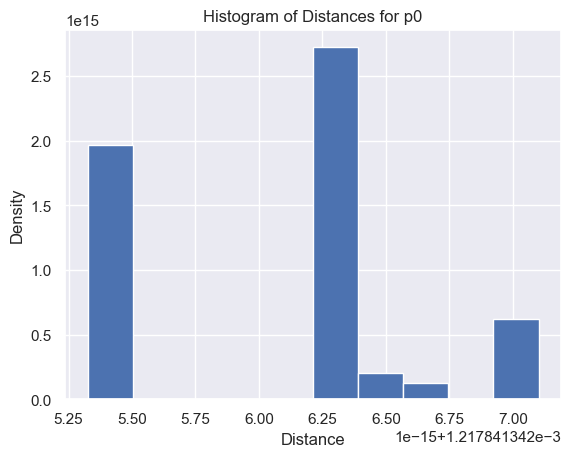

[[np.int64(0), np.int64(1218)], [np.int64(1), np.int64(1201)], [np.int64(2), np.int64(6114)], [np.int64(3), np.int64(2380)], [np.int64(4), np.int64(5456)]]
[np.float64(0.00021918973962886668), np.float64(0.0006332148033707519), np.float64(0.00045055668701365903), np.float64(9.741766205628721e-05), np.float64(0.00031660740168604207)]
Mean distance: 0.0006140564024064541
Median distance: 0.0004262022714995872
Minimal distance: 1.2177207755925679e-05
Maximal distance: 0.005662401607065437


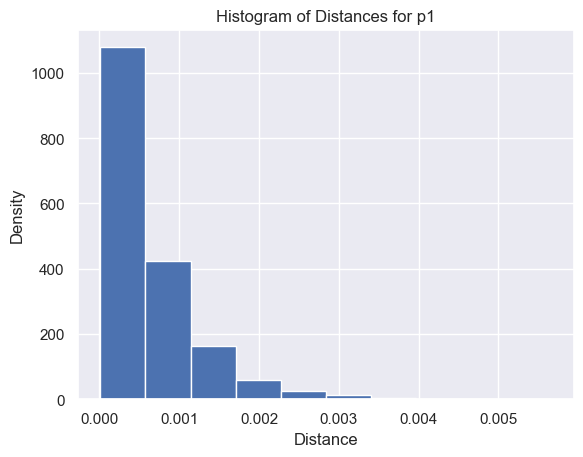

[[np.int64(0), np.int64(3305)], [np.int64(1), np.int64(6254)], [np.int64(2), np.int64(7246)], [np.int64(3), np.int64(4971)], [np.int64(4), np.int64(986)]]
[np.float64(0.0012178413421253254), np.float64(0.0012178413421262135), np.float64(0.0012178413421253254), np.float64(0.0012178413421253254), np.float64(0.0012178413421262135)]
Mean distance: 0.0012178413421260184
Median distance: 0.0012178413421262135
Minimal distance: 0.0012178413421253254
Maximal distance: 0.0012178413421271017


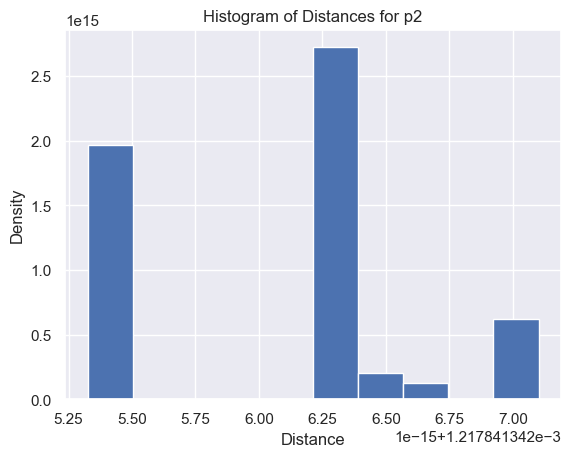

In [138]:
def find_neighbor_index(mylist, start_point):
    min_difference = math.inf
    neighbour = None

    for i in mylist:
        if i != start_point:  # Skip the start_point itself
            diff = abs(start_point - i)
            if diff < min_difference:
                min_difference = diff
                neighbour = i

    start_index = np.where(mylist == start_point)[0][0]
    neighbor_index = np.where(mylist == neighbour)[0][0]
    return [start_index, neighbor_index]

def find_distance(mylist, neighbours, index):
    start_point = mylist[neighbours[index][0]]
    neighbour   = mylist[neighbours[index][1]]
    distance = abs(start_point - neighbour)
    return distance

def analyse_list(mylist, title):
    # create list of index values for two closest values
    t = []
    for _, value in enumerate(mylist):
        t.append(find_neighbor_index(np.array(mylist), value))
    print(t[:5])

    # find the distance between the two closest values
    distances = []
    for i in range(len(t)):
        distances.append(find_distance(np.array(mylist), t, i))
    print(distances[:5])

    print(f"Mean distance: {np.mean(distances)}")
    print(f"Median distance: {np.median(distances)}")
    print(f"Minimal distance: {np.min(distances)}")
    print(f"Maximal distance: {np.max(distances)}")

    plt.hist(distances, density=True)
    plt.title(f'Histogram of Distances for {title}')
    plt.xlabel('Distance')
    plt.ylabel('Density')
    plt.show()

analyse_list(p0, "p0")
analyse_list(p1, "p1")
analyse_list(p2, "p2")

In [ ]:
p2_new = p2
for index, value in enumerate(p2):
    if index % 3 == 0:
        p2_new = np.delete(p2_new, index)

print(p2_new[:5])

# new list of neighbour pair indexes
t = []
for _, value in enumerate(p2_new):
    t.append(find_neighbor_index(np.array(p2_new), value))
print(t[:5])

IndexError: arrays used as indices must be of integer (or boolean) type

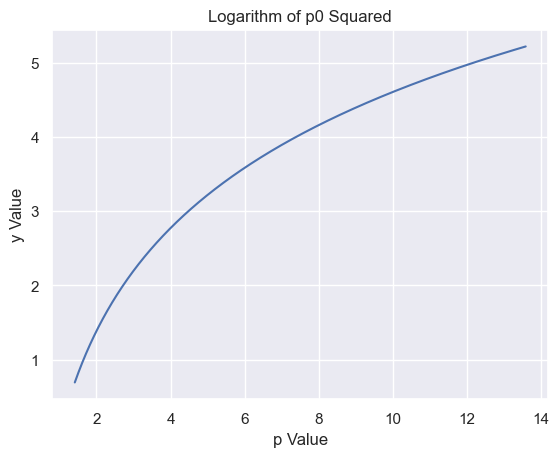

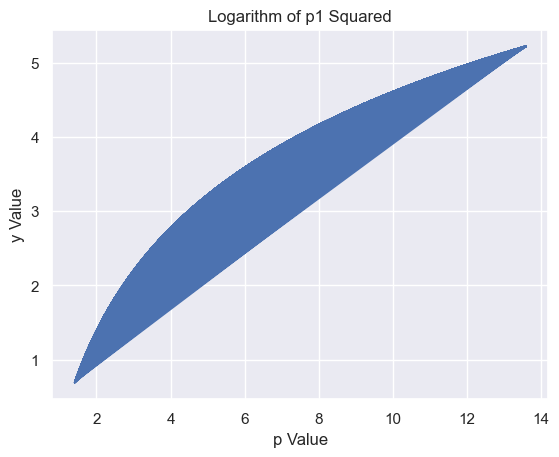

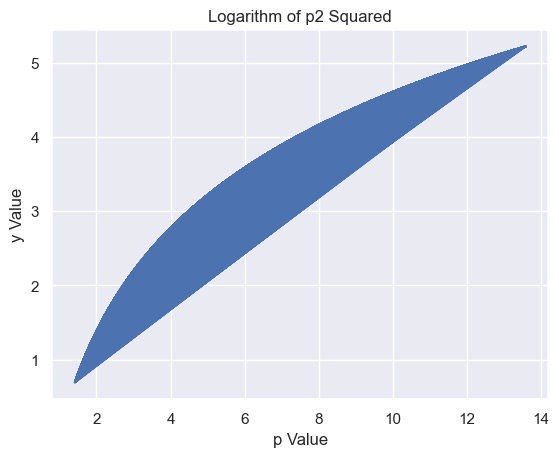

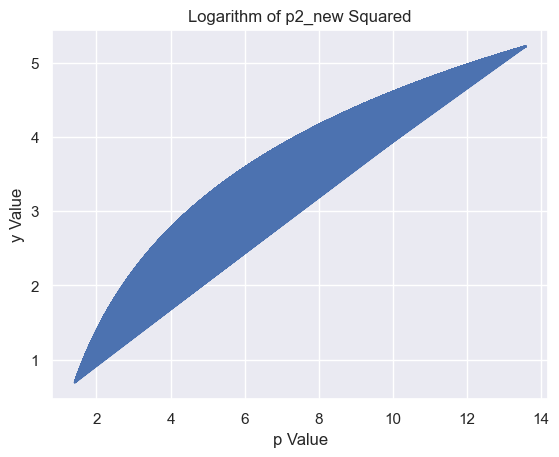

In [148]:
def plot_log_squared(mylist, title):
    mylist = np.array(mylist)
    y = np.log(mylist**2)
    plt.plot(mylist, y)
    plt.title(f'Logarithm of {title} Squared')
    plt.xlabel('p Value')
    plt.ylabel('y Value')
    plt.show()

plot_log_squared(p0, "p0")
plot_log_squared(p1, "p1")
plot_log_squared(p2, "p2")
plot_log_squared(p2_new, "p2_new")